In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
import compression as C
from matplotlib.pyplot import imshow

%matplotlib inline

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


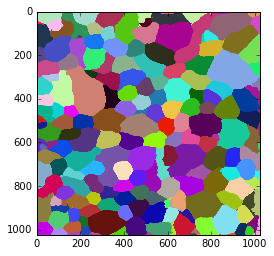

In [2]:
# Load data
data = C.Util.load_data('cremi')
# Fritz only
#data = C.Util.load_data('cremi', -1, '/Volumes/FFRITZ/cs222/cremi/rhoana/')
imshow(C.Util.colorize(data[0]))

In [3]:
# SETUP

# Iterations
N = 5

# DEFAULT --------------------------------------------------
# Compression methods
def_coms = [
    C.BOCKWURST,
    C.LZMA,
    C.ZLIB
]

# Encoding methods
def_encs = [
    C.NE,
    C.NG,
    C.RLE
]

# ALL ------------------------------------------------------
# compression methods
all_coms = [
    C.BOCKWURST,
    # C.BROTLI,
    C.BZ2,
    C.JPEG2000,
    C.LZ78,
    # C.LZF,
    C.LZMA,
    C.LZO,
    C.LZW,
    C.PNG,
    C.X264,
    C.ZLIB,
    # C.ZOPFLI,
    C.ZSTD
]

# encoding methods
all_encs = [
    C.NE,
    C.RLE,
    C.NG,
    C.BOCKWURST
]

# ENCODING ONLY -------------------------------------------
# Compression methods
enc_only_coms = [
    C.NC
]

# encoding methods
enc_only_encs = [
    C.RLE,
    C.NG,
    C.BOCKWURST
]

In [4]:
# RUN: default
results_default = C.Util.run_experiments(data=data, N=N, com_alg=def_coms, enc_alg=def_encs, verbose=True)

> NE + Bockwurst
Compression Method: Bockwurst
Encoding Method: NE
Input Size: 1048.576 MB
Output Size: 1.195952 MB
Ratio: 876.770974086
Total Compression Speed [MB/s]: 49.7737436196
Total Decompression Speed [MB/s]: 28.3014938424
Compression (Only) Speed [MB/s]: 49.7737554489
Decompression (Only) Speed [MB/s]: 28.3014945708
Encoding Speed [MB/s]: 209430786.243
Decoding Speed [MB/s]: 1099511627.78

> NE + LZMA
Compression Method: LZMA
Encoding Method: NE
Input Size: 1048.576 MB
Output Size: 2.92818 MB
Ratio: 358.098204345
Total Compression Speed [MB/s]: 8.48754677889
Total Decompression Speed [MB/s]: 521.704048075
Compression (Only) Speed [MB/s]: 8.48754705734
Decompression (Only) Speed [MB/s]: 521.704543159
Encoding Speed [MB/s]: 258708618.3
Decoding Speed [MB/s]: 549755813.888

> Neuroglancer + LZMA
Compression Method: LZMA
Encoding Method: Neuroglancer
Input Size: 1048.576 MB
Output Size: 1.843548 MB
Ratio: 568.781501756
Total Compression Speed [MB/s]: 27.5300694824
Total Decompress

In [5]:
# RUN: all
results_all = C.Util.run_experiments(data=data, N=N, com_alg=all_coms, enc_alg=all_encs, verbose=True)

> NE + Bockwurst
Compression Method: Bockwurst
Encoding Method: NE
Input Size: 1048.576 MB
Output Size: 1.195952 MB
Ratio: 876.770974086
Total Compression Speed [MB/s]: 47.8539655944
Total Decompression Speed [MB/s]: 23.9037194403
Compression (Only) Speed [MB/s]: 47.8539723633
Decompression (Only) Speed [MB/s]: 23.90371996
Encoding Speed [MB/s]: 338311270.085
Decoding Speed [MB/s]: 1099511627.78

> NE + BZip2
Compression Method: BZip2
Encoding Method: NE
Input Size: 1048.576 MB
Output Size: 3.091935 MB
Ratio: 339.132614366
Total Compression Speed [MB/s]: 3.65481543642
Total Decompression Speed [MB/s]: 86.8185903109
Compression (Only) Speed [MB/s]: 3.6548154759
Decompression (Only) Speed [MB/s]: 86.818646867
Encoding Speed [MB/s]: 338311270.085
Decoding Speed [MB/s]: 133274136.7

> RLE + BZip2
Compression Method: BZip2
Encoding Method: RLE
Input Size: 1048.576 MB
Output Size: 2.802564 MB
Ratio: 374.148815156
Total Compression Speed [MB/s]: 120.727896175
Total Decompression Speed [MB/s]:

In [6]:
# RUN: encoding only
results_enc_only = C.Util.run_experiments(data=data, N=N, com_alg=enc_only_coms, enc_alg=enc_only_encs, verbose=True)

> RLE + NC
Compression Method: NC
Encoding Method: RLE
Input Size: 1048.576 MB
Output Size: 36.192032 MB
Ratio: 28.972565011
Total Compression Speed [MB/s]: 155.182462941
Total Decompression Speed [MB/s]: 256.341141986
Compression (Only) Speed [MB/s]: 338311270.085
Decompression (Only) Speed [MB/s]: 366503875.925
Encoding Speed [MB/s]: 155.182534122
Decoding Speed [MB/s]: 256.341321277

> Neuroglancer + NC
Compression Method: NC
Encoding Method: Neuroglancer
Input Size: 1048.576 MB
Output Size: 54.243632 MB
Ratio: 19.3308589661
Total Compression Speed [MB/s]: 54.8515093316
Total Decompression Speed [MB/s]: 203.871151972
Compression (Only) Speed [MB/s]: 366503875.925
Decompression (Only) Speed [MB/s]: 1099511627.78
Encoding Speed [MB/s]: 54.8515175408
Decoding Speed [MB/s]: 203.871189773

> Bockwurst + NC
Compression Method: NC
Encoding Method: Bockwurst
Input Size: 1048.576 MB
Output Size: 18.214688 MB
Ratio: 57.5676069774
Total Compression Speed [MB/s]: 81.1944195157
Total Decompressi

In [ ]:
# PLOT: default

C.Util.plot(
    results_default['methods'],
    results_default['bytes'],
    results_default['ratios'],
    results_default['total_comp_speed'],
    results_default['total_comp_speed_std'],
    results_default['total_decomp_speed'],
    results_default['total_decomp_speed_std'],
    'cremi',
    bw=True
)

In [ ]:
# PLOT: all

C.Util.plot(
    results_all['methods'],
    results_all['bytes'],
    results_all['ratios'],
    results_all['total_comp_speed'],
    results_all['total_comp_speed_std'],
    results_all['total_decomp_speed'],
    results_all['total_decomp_speed_std'],
    'cremi',
    bw=True
)

In [ ]:
# Plot results

C.Util.plot(
    results_enc_only['methods'],
    results_enc_only['bytes'],
    results_enc_only['ratios'],
    results_enc_only['total_comp_speed'],
    results_enc_only['total_comp_speed_std'],
    results_enc_only['total_decomp_speed'],
    results_enc_only['total_decomp_speed_std'],
    'cremi',
    bw=True
)

In [7]:
import cPickle as pickle

In [8]:
with open('/home/d/data/cremi_results_all.p', 'wb') as f:
    pickle.dump(results_all, f)

In [9]:
with open('/home/d/data/cremi_results_def.p', 'wb') as f:
    pickle.dump(results_default, f)

In [10]:
with open('/home/d/data/cremi_results_enc_only.p', 'wb') as f:
    pickle.dump(results_enc_only, f)